# **Intoduction**
Dalam proyek ini, saya akan melakukan analisis RFM (Recency, Frequency, Monetary) pada dataset Online Retail yang diambil dari UCI Repository bertujuan untuk mendapatkan insight dari penjualan dan dapat menentukan strategi bisnis. 

(Chen, Daqing. "Online Retail." UCI Machine Learning Repository, 2015, https://doi.org/10.24432/C5BW33.)

# **Import Dependencies**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Data Wrangling**

### **Data Collection**

In [2]:
# Fetch dataset
df = pd.read_excel("online_retail.xlsx")

In [3]:
# Head
print("\nDataset head:", df.head())

# Length
print("\nDataset length:", len(df))


Dataset head:   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

Dataset length: 541909


### **Data Transformation**

In [4]:
# Data type
print("Dataset datatype:", df.dtypes)

Dataset datatype: InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [5]:
# Quantity & UnitPrice sudah numerik, tidak perlu diubah

# InvoiceDate sudah datetime

# Ubah CustomerID ke kategori karena ini adalah kode unik pelanggan
df['CustomerID'] = df['CustomerID'].astype('category')

### **Data Cleaning**

In [6]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Negative values
print(f"Negative values:", (df_numeric < 0).sum().sum())

# Missing values
print("\nMissing values:", df.isnull().sum())

# Duplicated values
print("\nDuplicated values:", df.duplicated().sum())

Negative values: 10626

Missing values: InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Duplicated values: 5268


In [7]:
# Delete negative values
mask = (df_numeric < 0).any(axis=1)
df = df[~mask]

In [8]:
# Delete missing values
df = df.dropna(subset=['CustomerID'])

In [9]:
# Delete duplicate values
df = df.drop_duplicates()

In [10]:
# Delete Quantity = 0
mask = df["UnitPrice"] < 0.04
df = df[~mask]

In [11]:
# # Delete canceled orders
# df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Sudah ditangani dengan mengapus negative values.

In [12]:
# Drop unrelated columns
df = df.drop(columns=['StockCode', 'Description', 'Country'])

# **Exploratory Data Analysis (EDA)**

### **Descriptive Statistics**

In [13]:
# Describe
print("\nDataset describe:", df.describe(include=['float64', 'int64']))


Dataset describe:             Quantity      UnitPrice
count  392688.000000  392688.000000
mean       13.119825       3.125946
std       180.493747      22.241947
min         1.000000       0.040000
25%         2.000000       1.250000
50%         6.000000       1.950000
75%        12.000000       3.750000
max     80995.000000    8142.750000


### **Outlier**

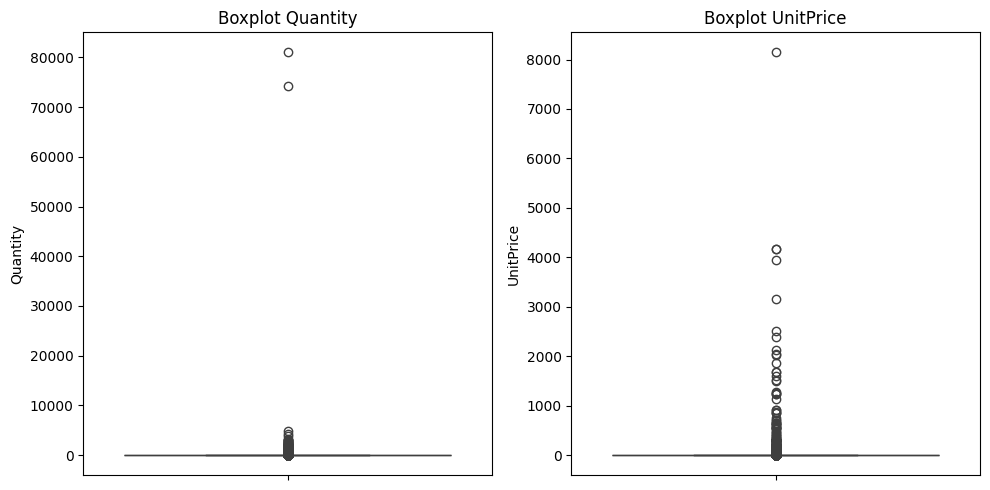

In [15]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
numeric_columns = df_numeric.columns

num_cols = len(numeric_columns)

fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 5), tight_layout=True)

# Boxplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot {col}')
    axes[i].set_ylabel(col)

plt.show()

### **Initial Hypothesis**

<span style="font-size: 14px;">  

**Insight Statistik Deskriptif:**  

1. **Jumlah Data (`count`)**  
   - `Quantity` & `UnitPrice`: **392,688** (lengkap, tidak ada missing values).  

2. **Rata-rata (`mean`)**  
   - `Quantity`: **13.12** (barang rata-rata per transaksi).  
   - `UnitPrice`: **3.12** (harga rata-rata per unit).  

3. **Standar Deviasi (`std`)**  
   - `Quantity`: **180.49** (**indikasi outlier** → penyebaran data sangat luas).  
   - `UnitPrice`: **22.24** (**ada harga ekstrem**).  

4. **Nilai Minimum (`min`)**  
   - `Quantity`: **1** (transaksi terkecil = 1 barang).  
   - `UnitPrice`: **0.04** (**harga sangat rendah, mungkin diskon/promo?**).  

5. **Distribusi Data (Q1, Median, Q3)**  
   - `Quantity`:  
     - **Q1 = 2** → 25% transaksi ≤ 2 barang.  
     - **Median = 6** → 50% transaksi ≤ 6 barang.  
     - **Q3 = 12** → 75% transaksi ≤ 12 barang.  
   - `UnitPrice`:  
     - **Mayoritas harga antara 1.25 - 3.75** per unit.  

6. **Nilai Maksimum (`max`)**  
   - `Quantity`: **80,995** (**outlier ekstrem**).  
   - `UnitPrice`: **8,142.75** (**harga tidak biasa, outlier?**).  

**Insight Boxplot:**  
- Outlier terdeteksi pada `Quantity` dan `UnitPrice`. Perlu verifikasi dari deskripsi dataset.

**Kesimpulan Awal**
1. Outlier pada `Quantity` dan `UnitPrice` tidak perlu dihapus karena berdasarkan deskripsi dataset hal ini karena customer membeli secara grosir.
2. Harga yang sangat rendah pada `UnitPrice` tidak perlu dihapus karena harga produk memang rendah.
3. Sebaran harga dimana beberapa transaksi memiliki harga sangat tinggi juga karena customer membeli secara grosir.

</span>  

# **RFM Analysis**

<span style="font-size: 14px;">  

- **Recency (R)**: `InvoiceDate` dihitung dengan `recent_date - x.max()`
- **Frequency (F)**: `InvoiceNo` dihitung dengan `nunique()` (jumlah transaksi unik)
- **Monetary (M)**: `TotalPrice` dihitung dengan `sum()` (total pengeluaran pelanggan)

<span>

In [16]:
# Tanggal acuan
recent_date = df['InvoiceDate'].max()   # Menggunakan tanggal terkahir

# Hitung Monetary (Total Spending)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group by CustomerID untuk mendapatkan RFM Metrics
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (recent_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
})

# Ubah nama kolom agar lebih jelas
rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

C:\Users\ansha\AppData\Local\Temp\ipykernel_20976\900196272.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_df = df.groupby('CustomerID').agg({


# **Explanatory Data Analysis (ExDA)**

### **Evaluation**

Text(0.5, 1.0, 'RFM Correlation Heatmap')

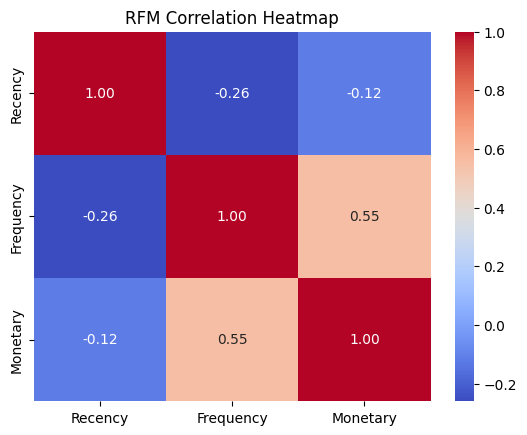

In [17]:
# Korelasi antar variabel RFM
sns.heatmap(rfm_df[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', fmt=".2f").set_title("RFM Correlation Heatmap")

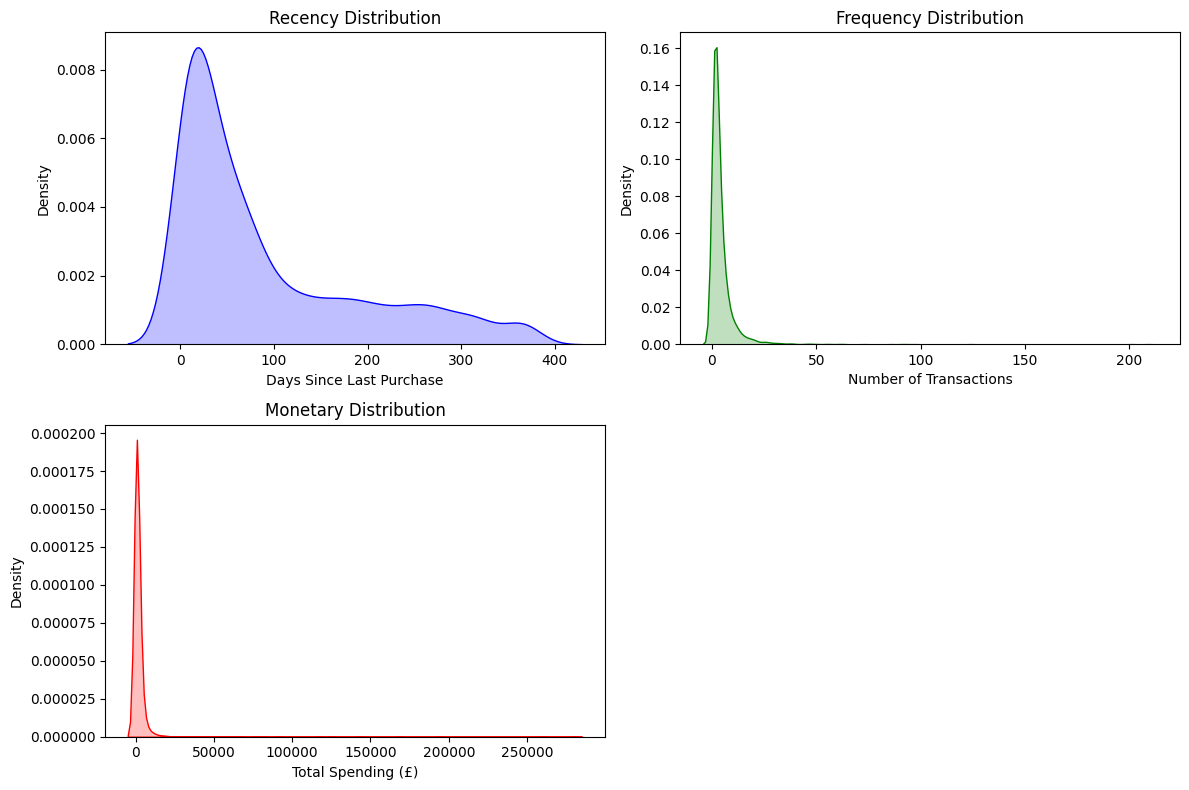

In [18]:
plt.figure(figsize=(12, 8))

# Recency Distribution
plt.subplot(2, 2, 1)
sns.kdeplot(rfm_df['Recency'], fill=True, color='blue')
plt.xlabel('Days Since Last Purchase')  # Satuan dalam hari
plt.ylabel('Density')
plt.title('Recency Distribution')

# Frequency Distribution
plt.subplot(2, 2, 2)
sns.kdeplot(rfm_df['Frequency'], fill=True, color='green')
plt.xlabel('Number of Transactions')  # Satuan dalam jumlah transaksi unik
plt.ylabel('Density')
plt.title('Frequency Distribution')

# Monetary Distribution
plt.subplot(2, 2, 3)
sns.kdeplot(rfm_df['Monetary'], fill=True, color='red')
plt.xlabel('Total Spending (£)')  # Satuan dalam jumlah uang yang dibelanjakan
plt.ylabel('Density')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

### **Insight**

<span style="font-size: 14px;">  

**Insight Korelasi:**  
- **Recency vs Frequency (-0.26)** → Korelasi negatif lemah. Pelanggan yang sering bertransaksi cenderung memiliki waktu transaksi terakhir lebih baru.  
- **Recency vs Monetary (-0.12)** → Korelasi sangat lemah. Pelanggan dengan waktu terakhir transaksi tidak terlalu berpengaruh dengan total pengeluarannya.  
- **Frequency vs Monetary (0.55)** → Korelasi positif sedang. Pelanggan yang sering bertransaksi cenderung memiliki total pengeluaran tinggi.  

**Insight Distribusi Data:**  
- **Recency** right-skewed → Mayoritas pelanggan bertransaksi baru-baru ini dan beberapa sudah lama tidak bertransaksi.  
- **Frequency** right-skewed → Sebagian besar pelanggan jarang bertransaksi, hanya sedikit yang sering bertransaksi.  
- **Monetary** right-skewed → Sebagian besar pelanggan memiliki total pengeluaran rendah, hanya beberapa dengan total pengeluaran tinggi.  

**Kesimpulan:**  
- Insight menunjukkan korelasi negatif lemah pada R vs F dan R vs M dimana pelanggan yang lebih sering bertransaksi cenderung memiliki waktu transaksi terakhir yang lebih baru. Beberapa pelanggan berbelanja dalam jumlah besar tetapi jarang (pembeli grosir), sementara yang lain lebih sering tetapi dengan nilai transaksi kecil. Korelasi positif moderat F vs M menunjukkan pelanggan yang sering bertrasaksi cenderung memiliki total pengeluaran tinggi.

- Berdasarkan distribusi data, mayoritas pelanggan baru bertransaksi, sebagian besar pelanggan jarang bertransaksi dengan hanya sedikit yang sering membeli, dan sebagian besar pelanggan memiliki pengeluaran rendah.

**Strategi**   
Strategi dapat difokuskan pada `pemberian penawaran/promosi` produk sehingga meningkatkan frekuensi transaksi untuk retargeting pelanggan lama dan meningkatkan total pengeluaran pelanggan dengan pengeluaran rendah. untuk pelanggan dengan pengeluaran tinggi dapat `diberikan pengalaman eksklusif` seperti program VIP untuk memaksimalkan lifetime value.

"Mendapatkan pelanggan baru itu mahal, sementara mempertahankan pelanggan lama jauh lebih menguntungkan" -Philip Kotler.

</span>

# **Export Data**

In [19]:
# Simpan hasil RFM
rfm_df.to_excel("rfm_analysis.xlsx", index=True)

# Head
print("\nDataset head:", rfm_df.head())

# Length
print("\nDataset length:", len(rfm_df))


Dataset head:             Recency  Frequency  Monetary
CustomerID                              
12346.0       325.0          1  77183.60
12347.0         1.0          7   4310.00
12348.0        74.0          4   1797.24
12349.0        18.0          1   1757.55
12350.0       309.0          1    334.40

Dataset length: 4372
